In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [100]:
letterboxd_data = pd.read_csv("./datasets/Letterbox_Movie_Classification_Dataset.csv", index_col = 0)

In [101]:
# Preprocess and Cleaning
letterboxd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10001
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10000 non-null  object 
 1   Director           10000 non-null  object 
 2   Average_rating     10000 non-null  float64
 3   Genres             10000 non-null  object 
 4   Runtime            10000 non-null  float64
 5   Original_language  10000 non-null  object 
 6   Description        10000 non-null  object 
 7   Studios            10000 non-null  object 
 8   Watches            10000 non-null  int64  
 9   List_appearances   10000 non-null  int64  
 10  Likes              10000 non-null  int64  
 11  Fans               10000 non-null  int64  
 12  Lowest★            10000 non-null  int64  
 13  Medium★★★          10000 non-null  int64  
 14  Highest★★★★★       10000 non-null  int64  
 15  Total_ratings      10000 non-null  int64  
dtypes: float64(2), int64(8), ob

In [102]:
letterboxd_data.rename(columns={letterboxd_data.columns[12]: 'Lowest', letterboxd_data.columns[13]: 'Medium', letterboxd_data.columns[14]: 'Highest'}, inplace=True)

In [103]:
letterboxd_data.describe()

,Average_rating,Runtime,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,3.268535,103.169352,1.703148e+05,26868.798600,4.373479e+04,1652.549700,1837.319600,17887.078300,1.817158e+04,1.063923e+05
std,0.525744,38.070735,4.585329e+05,56751.328696,1.515314e+05,9368.258118,5617.492419,43713.123082,8.323460e+04,2.947343e+05
min,1.080000,2.000000,2.000000e+00,33.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.950000,89.000000,2.979750e+03,1674.000000,4.570000e+02,2.000000,35.000000,422.750000,6.000000e+01,1.895000e+03
50%,3.268535,99.000000,1.842500e+04,6503.000000,3.394000e+03,24.000000,181.000000,2422.500000,5.720000e+02,1.182300e+04
75%,3.620000,113.000000,1.083580e+05,23908.250000,2.011225e+04,283.000000,1083.250000,12727.000000,4.583250e+03,6.749875e+04
max,4.710000,907.000000,5.195503e+06,803670.000000,2.730813e+06,326000.000000,176637.000000,629879.000000,2.010363e+06,4.091037e+06


In [104]:
letterboxd_data.isna().sum()

Film_title           0
Director             0
Average_rating       0
Genres               0
Runtime              0
Original_language    0
Description          0
Studios              0
Watches              0
List_appearances     0
Likes                0
Fans                 0
Lowest               0
Medium               0
Highest              0
Total_ratings        0
dtype: int64

In [105]:
# Remove Duplicates
letterboxd_data.drop_duplicates(subset='Film_title', inplace=True)

In [106]:
# Create a genre-seperated DataFrame to use it for genre-based analysis.

genre_preprocess = letterboxd_data
genre_preprocess['Genres'] = (
    genre_preprocess['Genres']
    .str.strip("[]")              # remove the [ and ]
    .str.replace("'", "")         # remove single quotes
    .str.split(", ")              # split by comma + space
)


In [107]:
genre_exploded_data = genre_preprocess.explode('Genres')
genre_exploded_data

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings
0,The Fan,Eckhart Schmidt,3.57,Horror,92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
0,The Fan,Eckhart Schmidt,3.57,Drama,92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,Mad Max: Fury Road,George Miller,4.18,Adventure,121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
1,Mad Max: Fury Road,George Miller,4.18,Science Fiction,121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
1,Mad Max: Fury Road,George Miller,4.18,Action,121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,Simulant,April Mullen,2.26,Thriller,95.0,English,Faye attempts to replace her newly deceased hu...,"['Wango Films', 'Myriad Pictures', 'Particular...",4239,1135,345,0,369,491,41,3274
10000,Simulant,April Mullen,2.26,Science Fiction,95.0,English,Faye attempts to replace her newly deceased hu...,"['Wango Films', 'Myriad Pictures', 'Particular...",4239,1135,345,0,369,491,41,3274
10001,Roujin Z,Hiroyuki Kitakubo,3.59,Animation,80.0,Japanese,"Mr. Takazawa, an elderly invalid who is cared ...","['Tokyo Theatres Company', 'Sony Music Enterta...",9351,4041,2284,9,24,1405,316,6009
10001,Roujin Z,Hiroyuki Kitakubo,3.59,Science Fiction,80.0,Japanese,"Mr. Takazawa, an elderly invalid who is cared ...","['Tokyo Theatres Company', 'Sony Music Enterta...",9351,4041,2284,9,24,1405,316,6009


In [108]:
# Create a studio-seperated DataFrame to use it for studio-based analysis.
studio_preprocess = letterboxd_data
studio_preprocess['Studios'] = (
    studio_preprocess['Studios']
    .str.strip('[]')
    .str.replace("'", "")
    .str.split(", ")
    
)

In [109]:
studio_exploded_data = studio_preprocess.explode('Studios')

In [110]:
studio_exploded_data

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings
0,The Fan,Eckhart Schmidt,3.57,"[Horror, Drama]",92.0,German,The hero-worship that Simone has for a pop sin...,Barbara Moorse Workshop,12841,11032,3763,79,129,1660,714,9042
1,Mad Max: Fury Road,George Miller,4.18,"[Adventure, Science Fiction, Action]",121.0,English,An apocalyptic story set in the furthest reach...,Warner Bros. Pictures,2488721,331681,927538,38000,12530,158356,511140,1682389
1,Mad Max: Fury Road,George Miller,4.18,"[Adventure, Science Fiction, Action]",121.0,English,An apocalyptic story set in the furthest reach...,Village Roadshow Pictures,2488721,331681,927538,38000,12530,158356,511140,1682389
1,Mad Max: Fury Road,George Miller,4.18,"[Adventure, Science Fiction, Action]",121.0,English,An apocalyptic story set in the furthest reach...,Kennedy Miller Mitchell,2488721,331681,927538,38000,12530,158356,511140,1682389
1,Mad Max: Fury Road,George Miller,4.18,"[Adventure, Science Fiction, Action]",121.0,English,An apocalyptic story set in the furthest reach...,RatPac Entertainment,2488721,331681,927538,38000,12530,158356,511140,1682389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,Roujin Z,Hiroyuki Kitakubo,3.59,"[Animation, Science Fiction, Drama]",80.0,Japanese,"Mr. Takazawa, an elderly invalid who is cared ...",movic,9351,4041,2284,9,24,1405,316,6009
10001,Roujin Z,Hiroyuki Kitakubo,3.59,"[Animation, Science Fiction, Drama]",80.0,Japanese,"Mr. Takazawa, an elderly invalid who is cared ...",KADOKAWA Shoten,9351,4041,2284,9,24,1405,316,6009
10001,Roujin Z,Hiroyuki Kitakubo,3.59,"[Animation, Science Fiction, Drama]",80.0,Japanese,"Mr. Takazawa, an elderly invalid who is cared ...",TV Asahi,9351,4041,2284,9,24,1405,316,6009
10001,Roujin Z,Hiroyuki Kitakubo,3.59,"[Animation, Science Fiction, Drama]",80.0,Japanese,"Mr. Takazawa, an elderly invalid who is cared ...",Aniplex,9351,4041,2284,9,24,1405,316,6009


In [111]:
# First create an engagement score to calculate a unified metric for interaction quantity.
# Then add this column to each dataframe

engagement_cols = ['Watches', 'List_appearances', 'Likes', 'Fans']
scaler = MinMaxScaler()
letterboxd_data['engagement_score'] = scaler.fit_transform(letterboxd_data[engagement_cols]).mean(axis=1)

In [112]:
genre_exploded_data['engagement_score'] = scaler.fit_transform(genre_exploded_data[engagement_cols]).mean(axis=1)

In [113]:
studio_exploded_data['engagement_score'] = scaler.fit_transform(studio_exploded_data[engagement_cols]).mean(axis=1)

In [114]:
# Is there any correlation between Engagement Score and Average Rating?

corr_engagement_rating = letterboxd_data['engagement_score'].corr(letterboxd_data['Average_rating'])
print(f"Correlation: {corr_engagement_rating:.2f}")


'''There is no strong correlation between Engagement Score and Average Rating. However, movies that have higher
Engagement Score tends to have higher Average Rating.'''

Correlation: 0.31


'There is no strong correlation between Engagement Score and Average Rating. However, movies that have higher\nEngagement Score tends to have higher Average Rating.'

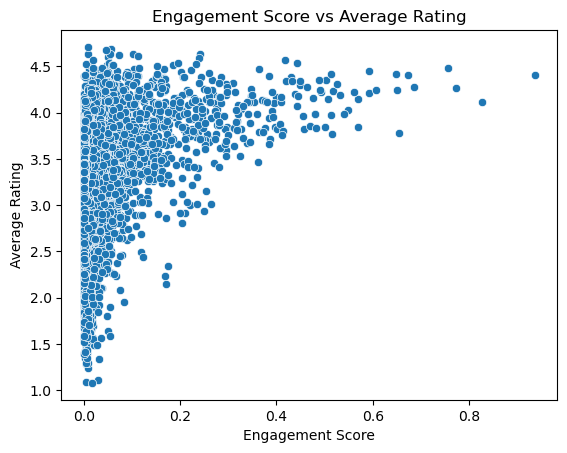

In [115]:
# Do movies that people engage with more tend to be rated better?
sns.scatterplot(letterboxd_data, x='engagement_score', y='Average_rating')
plt.title('Engagement Score vs Average Rating')
plt.xlabel('Engagement Score')
plt.ylabel('Average Rating')
plt.savefig('./plots_images/engagement_vs_rating.png')

# This could be also seen from this scatterplot clearly.

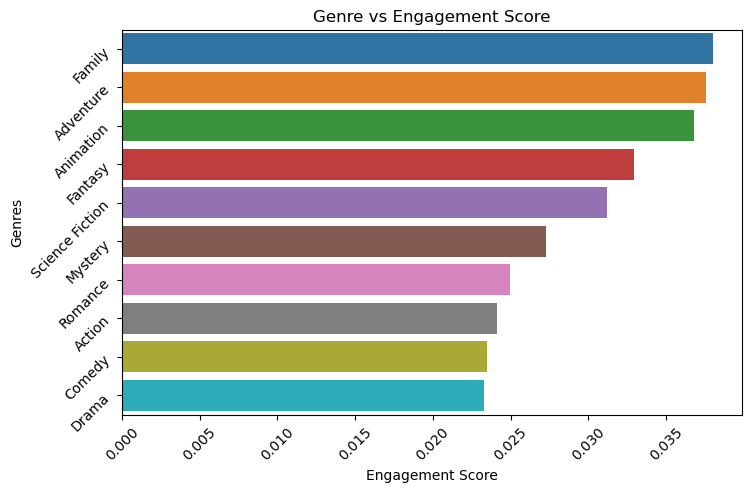

In [116]:
# What factors drive higher engagement? (Likes, Watches, List Apperances, Fans)
# First look at the effect of the genr

genre_to_engagement = genre_exploded_data.groupby('Genres')[['engagement_score']].mean().sort_values(by='engagement_score', ascending=False).head(10)
genre_to_engagement.reset_index(drop=False)

plt.figure(figsize=(8,5))
sns.barplot(data=genre_to_engagement, x='engagement_score', y=genre_to_engagement.index)
plt.title('Genre vs Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.savefig("./plots_images/genre_engagement.png")

In [117]:
# What factors drive higher engagement? (Likes, Watches, List Apperances, Fans)

In [118]:
# Now look at the effect of the studios.
# But consider only the studios that created movies more than a certain threshold and do not consider unknown studios.

studio_counts = studio_exploded_data['Studios'].value_counts()
valid_studios = studio_counts[(studio_counts >= 200) & (studio_counts.index != "Unknown")].index
filtered_studio_data = studio_exploded_data[studio_exploded_data['Studios'].isin(valid_studios)]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Warner Bros. Pictures'),
  Text(0, 1, 'Columbia Pictures'),
  Text(0, 2, '20th Century Fox'),
  Text(0, 3, 'Paramount Pictures'),
  Text(0, 4, 'Universal Pictures'),
  Text(0, 5, 'Metro-Goldwyn-Mayer')])

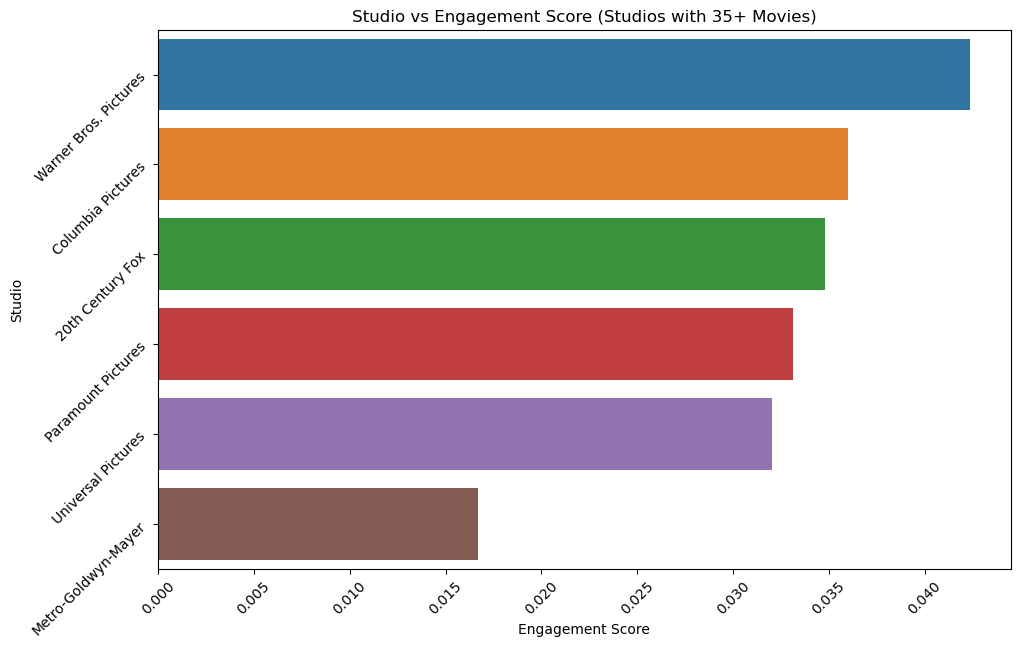

In [119]:
studio_to_engagement = filtered_studio_data.groupby('Studios')[['engagement_score']].mean().sort_values(by='engagement_score', ascending=False).head(10)
studio_to_engagement.reset_index(drop=False)

plt.figure(figsize=(11,7))
sns.barplot(data=studio_to_engagement, x='engagement_score', y=studio_to_engagement.index)
plt.title('Studio vs Engagement Score (Studios with 35+ Movies)')
plt.xlabel('Engagement Score')
plt.ylabel('Studio')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
#plt.savefig("./plots_images/Studio_vs_Engagement_35.png")

In [120]:
filtered_genre_data = genre_exploded_data.query("Genres != 'Unknown'")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Documentary'),
  Text(0, 1, 'History'),
  Text(0, 2, 'War'),
  Text(0, 3, 'Music'),
  Text(0, 4, 'Drama'),
  Text(0, 5, 'Animation'),
  Text(0, 6, 'Western'),
  Text(0, 7, 'Crime'),
  Text(0, 8, 'Romance'),
  Text(0, 9, 'Mystery')])

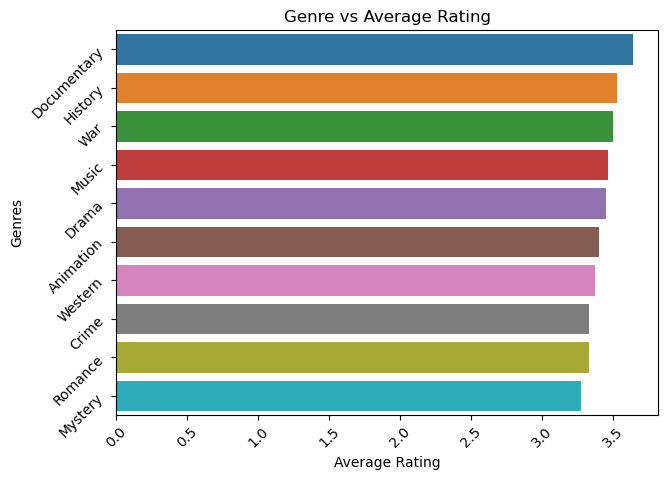

In [121]:
# Now check the effect of genres on average rating?

genre_to_rating = filtered_genre_data.groupby('Genres')[['Average_rating']].mean().sort_values(by='Average_rating', ascending=False).head(10)
genre_to_rating.reset_index(drop=False)

plt.figure(figsize=(7,5))
sns.barplot(data=genre_to_rating, x='Average_rating', y=genre_to_rating.index)
plt.title('Genre vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.savefig("./plots_images/Genre_vs_AverageRating.png")

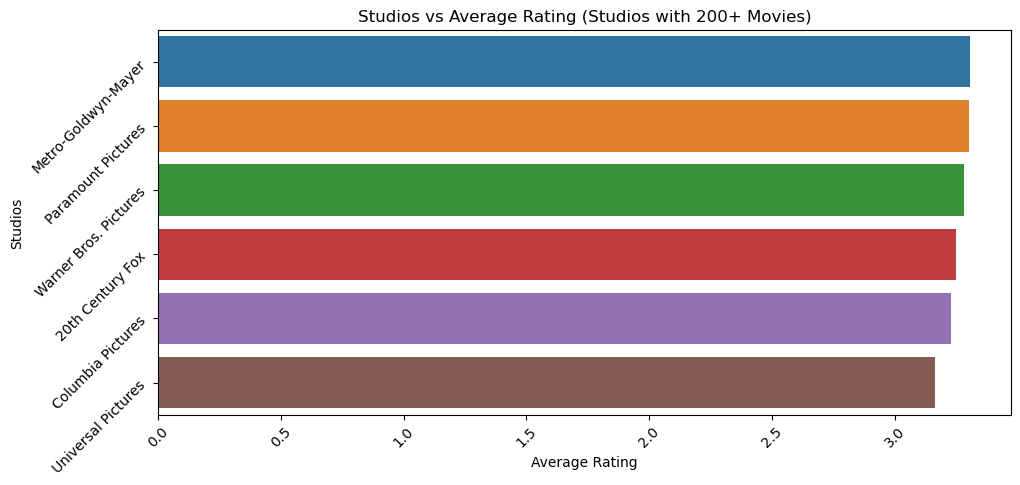

In [122]:
# Now check the effect of Studios on average rating?

studio_to_rating = (filtered_studio_data.groupby('Studios')[['Average_rating']].mean()
                    .sort_values(by='Average_rating', ascending=False).head(10))
studio_to_rating.reset_index(drop=False)

plt.figure(figsize=(11,5))
sns.barplot(data=studio_to_rating, x='Average_rating', y=studio_to_rating.index)
plt.title('Studios vs Average Rating (Studios with 200+ Movies)')
plt.xlabel('Average Rating')
plt.ylabel('Studios')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.savefig("./plots_images/studio_vs_Rating200.png")

In [123]:
#  Which language drives more engagement? (most common 10 languages)

#data_with_most_common_language

most_common_languages = letterboxd_data['Original_language'].value_counts().head(10).index
data_with_most_common_languages = letterboxd_data[letterboxd_data['Original_language'].isin(most_common_languages)]

In [124]:
data_with_most_common_languages_eng = data_with_most_common_languages.groupby('Original_language')[['engagement_score']].mean()\
.sort_values(by='engagement_score', ascending=False).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'English'),
  Text(0, 1, 'Japanese'),
  Text(0, 2, 'French'),
  Text(0, 3, 'Spanish'),
  Text(0, 4, 'No spoken language'),
  Text(0, 5, 'Korean'),
  Text(0, 6, 'German'),
  Text(0, 7, 'Danish'),
  Text(0, 8, 'Chinese'),
  Text(0, 9, 'Italian')])

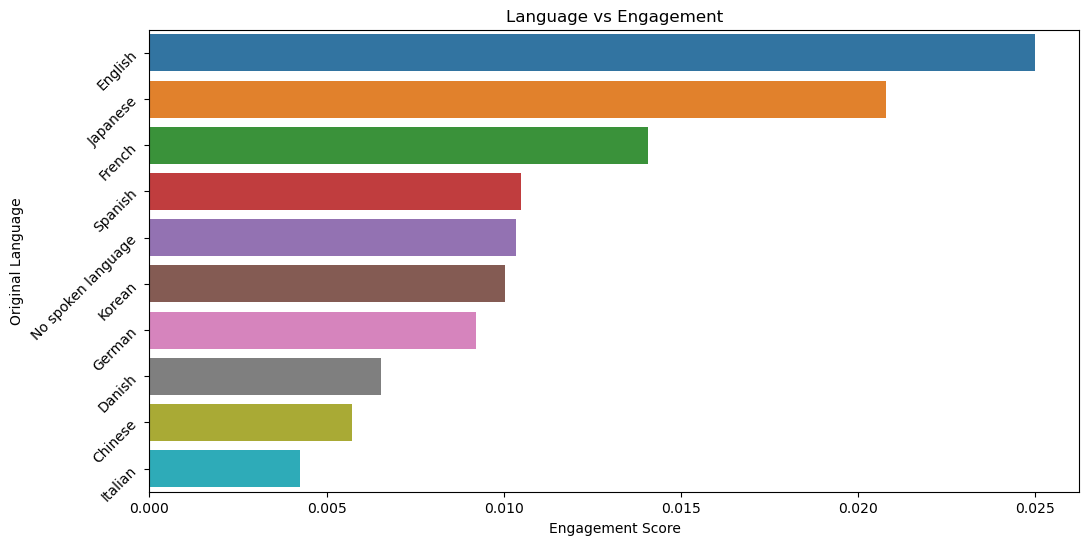

In [157]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_with_most_common_languages_eng, x='engagement_score', y='Original_language')
plt.xlabel('Engagement Score')
plt.ylabel('Original Language')
plt.title('Language vs Engagement')
plt.yticks(rotation=45)
#plt.savefig("./plots_images/language_vs_engagement.png")

In [153]:
# Now look at the effect of the language on the Average Rating?

data_with_most_common_languages_avg = data_with_most_common_languages.groupby('Original_language')[['Average_rating']]\
.mean().sort_values(by='Average_rating', ascending=False).reset_index()


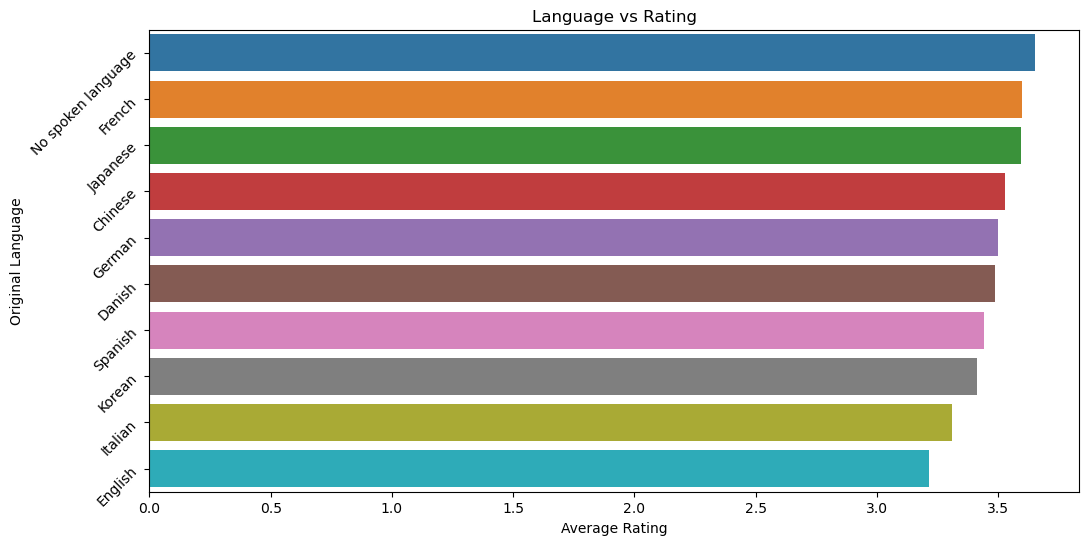

In [155]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_with_most_common_languages_avg, x='Average_rating', y='Original_language')
plt.xlabel('Average Rating')
plt.ylabel('Original Language')
plt.title('Language vs Rating')
plt.yticks(rotation=45)
plt.savefig("./plots_images/language_vs_rating.png")

In [981]:
# Movies with greater highest/totalrating ratio?

filtered_genre_data['Highest/Total_rating'] = filtered_genre_data['Highest'] / filtered_genre_data['Total_ratings']

/var/folders/mh/bg9wdjw13b36vqytnysdkv2m0000gn/T/ipykernel_61559/4140934177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genre_data['Highest/Total_rating'] = filtered_genre_data['Highest'] / filtered_genre_data['Total_ratings']


In [983]:
# What Genres take the most highest rating?
highest_rated_genres = filtered_genre_data.groupby('Genres')[['Highest/Total_rating']].mean().sort_values(by='Highest/Total_rating', ascending=False).reset_index().head(10)

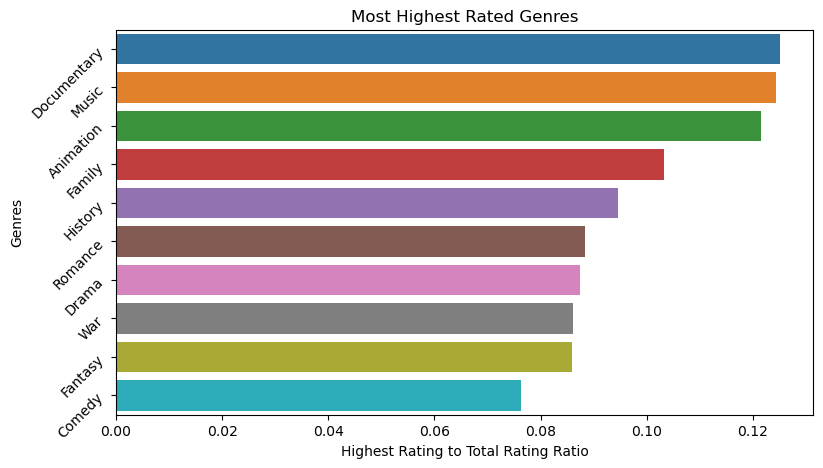

In [989]:
plt.figure(figsize=(9,5))
sns.barplot(data=highest_rated_genres, x='Highest/Total_rating', y='Genres')
plt.xlabel('Highest Rating to Total Rating Ratio')
plt.yticks(rotation=45)
plt.title('Most Highest Rated Genres')
plt.savefig("./plots_images/highest_to_total_rating_ratio.png")

In [75]:
# Analyse the effect of runtime on engagement.
# Create bins for runtime
letterboxd_data['runtime_bin'] = pd.qcut(letterboxd_data['Runtime'], q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

In [77]:
runtime_engagement_data = letterboxd_data.groupby('runtime_bin')[['engagement_score']].mean().reset_index().sort_values(by='engagement_score', ascending=False)
# Surprisingly, when analyzing the relationship between runtime and engagement, I found a positive correlation
# longer movies tend to receive higher engagement scores. This goes against the common assumption that shorter 
# content is more appealing due to attention spans. A possible interpretation is that longer films may offer more 
# depth or production quality, which leads to higher appreciation, shares, and fan activity. 

/var/folders/mh/bg9wdjw13b36vqytnysdkv2m0000gn/T/ipykernel_64221/2756494891.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_engagement_data = letterboxd_data.groupby('runtime_bin')[['engagement_score']].mean().reset_index().sort_values(by='engagement_score', ascending=False)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


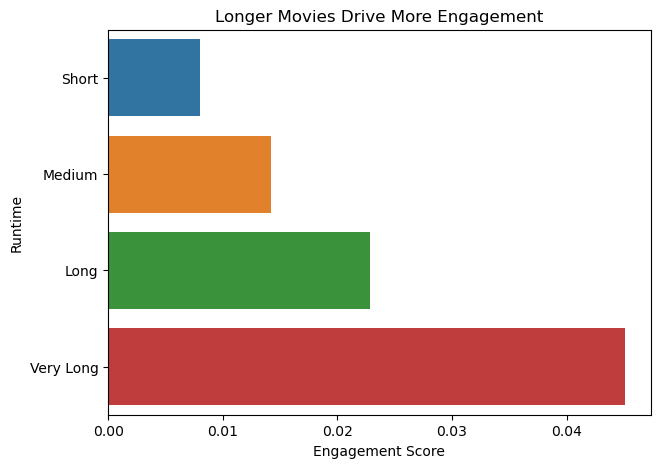

In [159]:
plt.figure(figsize=(7,5))
sns.barplot(data=runtime_engagement_data, x='engagement_score', y='runtime_bin')
plt.title('Longer Movies Drive More Engagement')
plt.xlabel('Engagement Score')
plt.ylabel('Runtime')
plt.savefig('./plots_images/runtime_engagment.png')
